In [42]:
import numpy as nmp
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# начальные данные
gamma = 0.95
N = 100
# выборка из нормального распределения
X = nmp.random.normal(0, 1, N)

Точный доверительный интервал для $a$ при неизвестном $\sigma^2$.

$P(-z_{\frac{1+\alpha}{2}} < \frac{(\overline X - a) \sqrt{n(n-1)}}{|X - \overline X|} < z_{\frac{1+\alpha}{2}}) = \alpha$ 

$P(\overline X - \frac{z_{\frac{1+\alpha}{2}}|X - \overline X|}{\sqrt{n(n-1)}}< a < \overline X + \frac{z_{\frac{1+\alpha}{2}} |X - \overline X|}{\sqrt{n(n-1)}}) = \alpha$

$z$ - квантиль распределения $T_{n - 1}$

C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


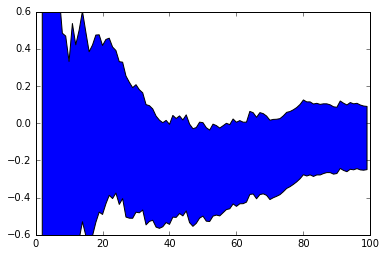

In [51]:
# начальные параметры
axis_x = nmp.arange(0, N, 1)
y_min = [0.0] * N
y_max = [0.0] * N

# просто подставляем все в формулы, выведенные выше
for i in range(0, N):
    y_min[i] = nmp.mean(X[:i]) - sts.t.ppf(0.5 + gamma / 2, df = i - 1) * nmp.sum(
        [abs(j - nmp.mean(X[:i])) for j in X[:i]]) / (i * ((i - 1) if i > 1 else 0.0001) ** 0.5)
    y_max[i] = nmp.mean(X[:i]) + sts.t.ppf(0.5 + gamma / 2, df = i - 1) * nmp.sum(
        [abs(j - nmp.mean(X[:i])) for j in X[:i]]) / (i * ((i - 1) if i > 1 else 0.0001) ** 0.5)    

# строим и выводим
plt.fill_between(axis_x, y_min, y_max)
plt.axis([0, N, -0.6, 0.6])
plt.show()

Точный доверительный интервал для $\sigma^2$ при неизвестном $a$.

$P(0 < \sigma^2 < \frac{n |X - \overline X|^2}{z_{1-\alpha}}) = \alpha$

$z_{1 - \alpha}$ - квантиль распределения $\chi^2_{n - 1}$


C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


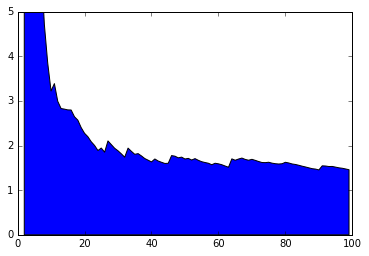

In [48]:
# аналогично
axis_x = nmp.arange(0, N, 1)
y_min = [0.0] * N
y_max = [0.0] * N
    
for i in range(0, N):
    y_max[i] = i * nmp.var(X[:i]) / sts.chi2.ppf(1 - gamma, df = i - 1)
        
plt.fill_between(axis_x, y_min, y_max)
plt.axis([0, N, 0, 5])
plt.show()

Точный доверительный интервал для $a$ при известном $\sigma$ 

$(\overline X  - a) \sim N(0, \frac{1}{n})$.

$P(-z_{\frac{1+\alpha}{2}} < (\overline X  - a) \cdot \sqrt n< z_{\frac{1+\alpha}{2}}) = \alpha$, 

$P(\overline X - \frac{z_{\frac{1+\alpha}{2}}}{\sqrt n} < a < \overline X + \frac{z_{\frac{1+\alpha}{2}}}{\sqrt n}) = \alpha$

Тогда $z_{\frac{1+\alpha}{2}}$ - квантиль распределения $N(a, 1)$.

C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\Irina\Anaconda3\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Irina\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Irina\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in double_scalars


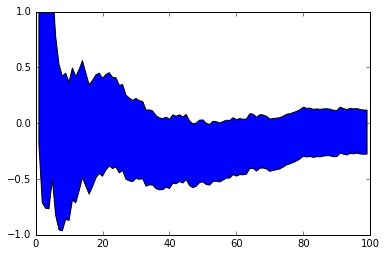

In [45]:
# аналогично
axis_x = nmp.arange(0, N, 1)
y_min = [0.0] * N
y_max = [0.0] * N
    
for i in range(0, N):
    y_min[i] = nmp.mean(X[:i]) - sts.norm.ppf(0.5 + gamma / 2) / (i ** 0.5)
    y_max[i] = nmp.mean(X[:i]) + sts.norm.ppf(0.5 + gamma / 2) / (i ** 0.5)
        
plt.fill_between(axis_x, y_min, y_max)
plt.axis([0, N, -1, 1])
plt.show()

Точный доверительный интервад для $\sigma$ при известном $a$

$\overline {X^2} \sim \chi^2(n) \sigma^2$ 

$P(z_{\frac{1-\alpha}{2}} < \frac{\overline {X^2}}{\sigma^2} < z_{\frac{1+\alpha}{2}}) = \alpha$

$P(\frac{\overline {X^2}}{z_{\frac{1-\alpha}{2}}} < \sigma^2 < \frac{\overline {X^2}}{z_{\frac{1+\alpha}{2}}}) = \alpha$

$z_{\frac{1 - \alpha}{2}}$ - квантиль распределения $\chi^2_n$

C:\Users\Irina\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Irina\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


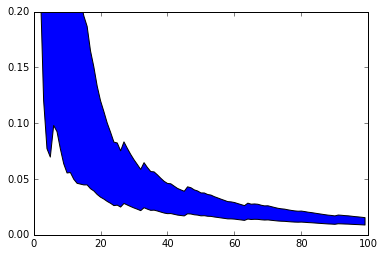

In [46]:
axis_x = nmp.arange(0, N, 1)
y_min = [0.0] * N
y_max = [0.0] * N
    
for i in range(0, N):
    y_min[i] = (nmp.sum(X[:i] ** 2) / i) / sts.chi2.ppf(0.5 + gamma / 2, df = i)
    y_max[i] = (nmp.sum(X[:i] ** 2) / i) / sts.chi2.ppf(0.5 - gamma / 2, df = i)
        
plt.fill_between(axis_x, y_min, y_max)
plt.axis([0, N, 0, 0.2])
plt.show()